<a href="https://colab.research.google.com/github/sreelakshmi-mundakkal/ISM-magnetic_fields/blob/main/polarization%20data%20analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(522, 20)
(426, 16)
(405, 34)


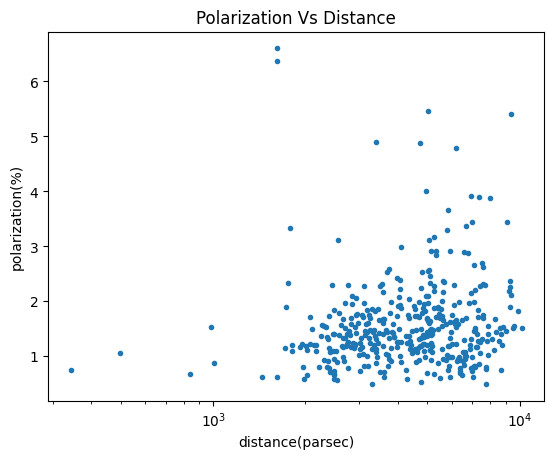

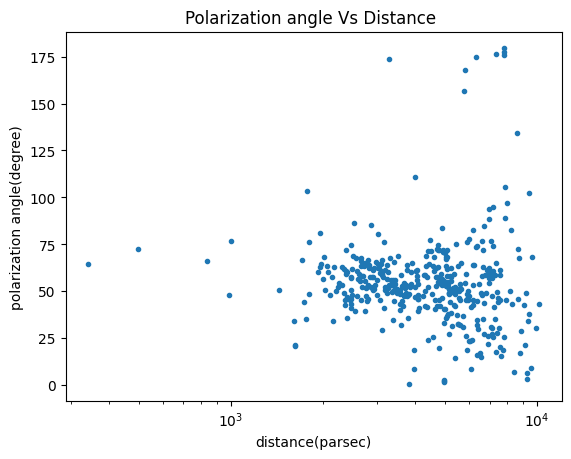

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/gpips -2mass - asu (1).csv')
data['Pol/e_Pol']=data['Pol']/data['e_Pol']
data1=data[data['Pol/e_Pol']>3]
df=pd.DataFrame(data1)
data2=pd.read_csv('/content/bailer jones -2 - asu (2) (1).csv')
data2['dist_err']=(data2['B_rpgeo']-data2['b_rpgeo'])/2
data2=data2[data2['rpgeo']/data2['dist_err']>=2]


print(data1.shape)
print(data2.shape)
df1=pd.merge(df,data2,on=['RAJ2000','DEJ2000'],how='inner')
df1=df1.dropna()
c=df1['e_Pol']
d=df1['e_PA']
print(df1.shape)
x=df1['rpgeo']
y=df1['Pol']
plt.xscale('log')
plt.scatter(x,y,marker='.')
#plt.errorbar(x,y,yerr=c,fmt="o")
#plt.savefig('distance Vs polarisation.png',dpi=300, bbox_inches='tight')
plt.xlabel('distance(parsec)')
plt.ylabel('polarization(%)')
plt.title('Polarization Vs Distance')
plt.savefig('distance Vs polarisation.png',dpi=300, bbox_inches='tight')
plt.show()
x=df1['rpgeo']
y=df1['EPA']
plt.xscale('log')
plt.scatter(x,y,marker='.')
#plt.errorbar(x,y,yerr=d,fmt="o",color="r")
plt.xlabel('distance(parsec)')
plt.ylabel('polarization angle(degree)')
plt.title('Polarization angle Vs Distance ')
plt.savefig('distance Vs polarisation angle.png',dpi=300, bbox_inches='tight')
plt.show()






1.567125925925926 0.8163060981464345


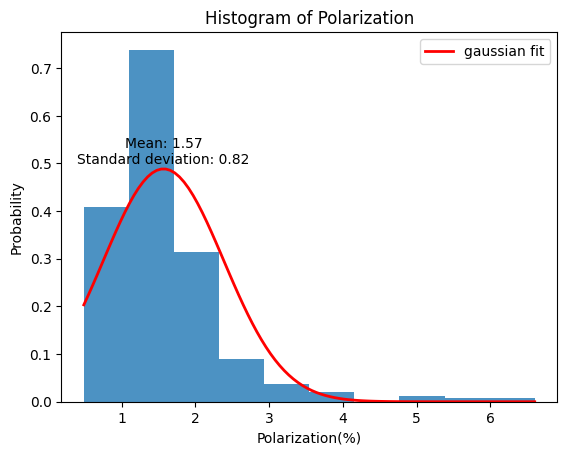

54.33306666666667 24.366018680911303


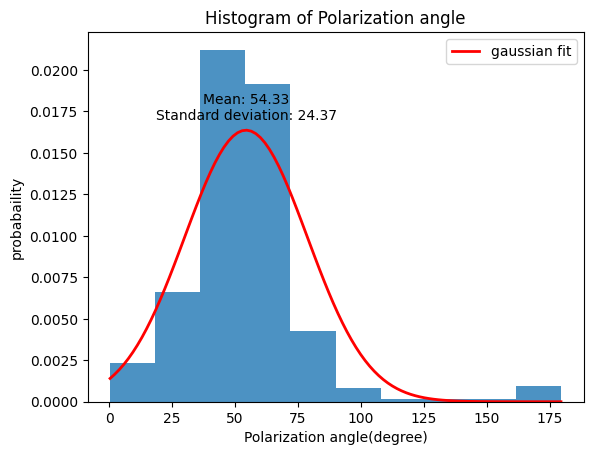

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
a=df1['Pol']
mu,sigma=stats.norm.fit(a)
print(mu,sigma)
x=np.linspace(a.min(),a.max(),100)
b=stats.norm.pdf(x,loc=mu,scale=sigma)
plt.hist(a,density=True,alpha=0.8,)
plt.plot(x,b,'r-',linewidth=2,label='gaussian fit')
plt.text(mu,0.5, f"Mean: {mu:.2f}\nStandard deviation: {sigma:.2f}", fontsize=10, ha='center')
#plt.hist(a)
plt.title('Histogram of Polarization')
plt.xlabel('Polarization(%)')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.savefig('Histogram of polarisation.png',dpi=300, bbox_inches='tight')
plt.show()

y=df1['EPA']
mu,sigma=stats.norm.fit(y)
print(mu,sigma)
x=np.linspace(y.min(),y.max(),100)
b=stats.norm.pdf(x,loc=mu,scale=sigma)
plt.hist(y,density=True,alpha=0.8)
plt.plot(x,b,'r-',linewidth=2,label='gaussian fit')
plt.text(mu,0.017, f"Mean: {mu:.2f}\nStandard deviation: {sigma:.2f}", fontsize=10, ha='center')
plt.title('Histogram of Polarization angle')
plt.xlabel('Polarization angle(degree)')
plt.ylabel('probabaility')
plt.legend(loc='upper right')
plt.savefig('Histogram of polarisation angle.png',dpi=300, bbox_inches='tight')
plt.show()


1.3399999999999999
2.9239999999999995


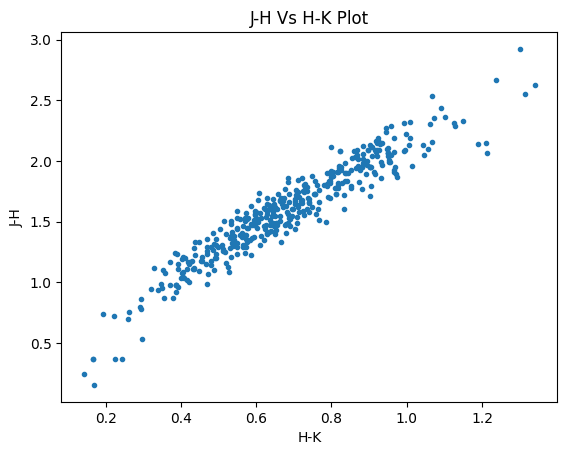

In [ ]:
import  matplotlib.pyplot as plt
df1['J-H']=df1['J2mag']-df1['H2mag']
df1['H-K']=df1['H2mag']-df1['Ks2mag']
x=df1['H-K']
y=df1['J-H']
print(max(x))
print(max(y))
plt.scatter(x,y,marker='.')
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.title('J-H Vs H-K Plot')
plt.savefig('J-H Vs H-K Plot.png',dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
df1['cit-J-H']=(df1['J-H']+0.047)/1.087
df1['cit-H-K']=(df1['H-K']-0.034)
df1['citerrHK']=(df1['e_H2mag']**2 +df1['e_Ks2mag']**2)**1/2
df1['citerrJH']=((df1['e_J2mag']**2 +df1['e_H2mag']**2)**1/2)/1.087
#print(df1.head(10))
print(max(df1['cit-H-K']))
print(max(df1['cit-J-H']))
#print(df1['cit-H-K'])

df2=pd.read_csv('/content/dwarfs - bbdwarfs.csv')
df3=pd.read_csv('/content/giants - bbgiants.csv')
df4=pd.read_csv('/content/cttsloci.csv')
df5=pd.read_csv('/content/redvec_CIT_MS.csv')
df5=df5[(df5['J-H']<3)&(df5['H-K']<2.5)]
df6=pd.read_csv('/content/redvec_CIT_Giants.csv')
df6=df6[(df5['J-H']<3)&(df6['H-K']<2.5)]
df7=pd.read_csv('/content/redvec_for_ctts.csv')
df2['cit-J-H']=(df2['J-H']+0.047)/1.087
df2['cit-H-K']=(df2['H-K']-0.034)
df2=df2[(df2['cit-J-H']<3)&(df2['cit-H-K']<1.5)]
df3['cit-J-H']=(df3['J-H']+0.047)/1.087
df3['cit-H-K']=(df3['H-K']-0.034)
df3=df3[(df3['cit-J-H']<3)&(df3['cit-H-K']<1.5)]
df4['cit-J-H']=(df4['J-H']+0.047)/1.087
df4['cit-H-K']=(df4['H-K']-0.034)
df4=df4[(df4['cit-J-H']<3)&(df4['cit-H-K']<1.5)]
df7['cit-J-H']=(df7['J-H']+0.047)/1.087
df7['cit-H-K']=(df7['H-K']-0.034)
df7=df7[(df7['cit-J-H']<3)&(df7['cit-H-K']<2.5)]



1.3059999999999998
2.733210671573137


(405, 40)
(2, 40)
(81, 40)
(322, 40)


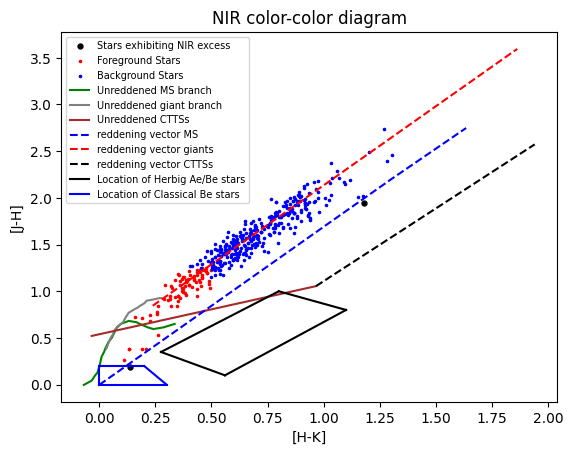

In [ ]:
import matplotlib.pyplot as plt
x=df1['cit-H-K']
y=df1['cit-J-H']
#plt.scatter(x,y,marker='.',s=10)
df8=df1[df1['cit-J-H']<1.69*df1['cit-H-K']]
df9=df1[(df1['cit-J-H']>=1.69*df1['cit-H-K'])]#|(df1['cit-H-K']>0.5)|(df1['cit-J-H']>1.25)]
df14=df9[(df9['cit-H-K']<0.5)&(df9['cit-J-H']<1.25)]
df15=df9[(df9['cit-H-K']>0.5)|(df9['cit-J-H']>1.25)]
df15=pd.DataFrame(df15)
#print(df15['cit-H-K'].head(10))
#print(df15['cit-J-H'].head(10))
#print(df15['citerrHK'].head(10))
print(df1.shape)
#print(df8.shape)
print(df8.shape)
print(df14.shape)
print(df15.shape)
plt.scatter(df8['cit-H-K'],df8['cit-J-H'],marker='.',s=50,color='black',label='Stars exhibiting NIR excess')#NIR Excess
plt.scatter(df14['cit-H-K'],df14['cit-J-H'],marker='.',s=10,color='red',label='Foreground Stars')#foreground
plt.scatter(df15['cit-H-K'],df15['cit-J-H'],marker='.',s=10,color='blue',label='Background Stars')#background

plt.xlabel('[H-K]')
plt.ylabel('[J-H]')
plt.title('NIR color-color diagram')
plt.plot(df2['cit-H-K'],df2['cit-J-H'],color='green',label='Unreddened MS branch')#dwarfs
plt.plot(df3['cit-H-K'],df3['cit-J-H'],color='grey',label='Unreddened giant branch')#giants
plt.plot(df4['cit-H-K'],df4['cit-J-H'],color='brown',label='Unreddened CTTSs')#ctt

plt.plot(df5['H-K'],df5['J-H'],linestyle='dashed',color='blue',label='reddening vector MS')#red vector ms
plt.plot(df6['H-K'],df6['J-H'],linestyle='dashed',color='red',label='reddening vector giants')#red vector giants
plt.plot(df7['cit-H-K'],df7['cit-J-H'],linestyle='dashed',color='black',label='reddening vector CTTSs')# red vector ctt

#Location of Herbig Ae/Be stars (black box)
plt.plot([0.275,0.56],[0.35,0.1],color='black',label='Location of Herbig Ae/Be stars')
plt.plot([0.56,1.1],[0.1,0.8],color='black')
plt.plot([1.1,0.8],[ 0.8,1.0],color='black')
plt.plot([ 0.8,0.275],[1.0,0.35],color='black')

#Location of Classical Be stars(blue box)
plt.plot([0,0.3],[0,0],color='blue',label='Location of Classical Be stars')
plt.plot([0,0],[0,0.2],color='blue')
plt.plot([0,0.2],[0.2,0.2],color='blue')
plt.plot([0.2,0.3],[0.2,0],color='blue')
plt.legend(loc='upper left',fontsize=7)
plt.savefig('hist final.png',dpi=300, bbox_inches='tight')
plt.show()


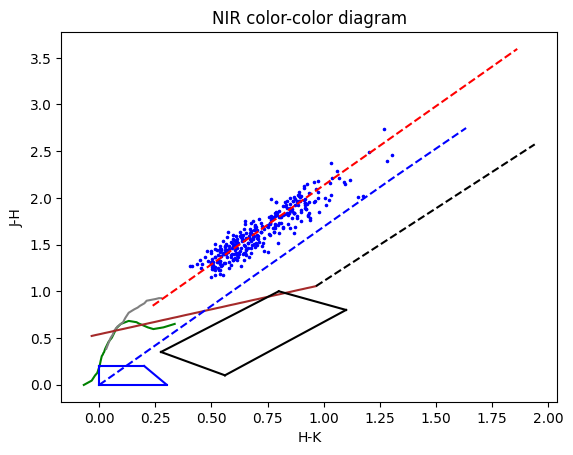

In [ ]:
import matplotlib.pyplot as plt
x=df1['cit-H-K']
y=df1['cit-J-H']
#plt.scatter(x,y,marker='.',s=10)
#df8=df1[(df1['cit-J-H']<1.69*df1['cit-H-K'])|(df1['cit-H-K']<0.5)|(df1['cit-J-H']<1.25)]
#df9=df1[(df1['cit-J-H']>=1.69*df1['cit-H-K'])&(df1['cit-H-K']>0.5)&(df1['cit-J-H']>1.25)]
#plt.scatter(df8['cit-H-K'],df8['cit-J-H'],marker='.',s=10,color='red')
plt.scatter(df15['cit-H-K'],df15['cit-J-H'],marker='.',s=10,color='blue')
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.title('NIR color-color diagram')
plt.plot(df2['cit-H-K'],df2['cit-J-H'],color='green')#dwarfs
plt.plot(df3['cit-H-K'],df3['cit-J-H'],color='grey')#giants
plt.plot(df4['cit-H-K'],df4['cit-J-H'],color='brown')#ctt

plt.plot(df5['H-K'],df5['J-H'],linestyle='dashed',color='blue')#red vector ms
plt.plot(df6['H-K'],df6['J-H'],linestyle='dashed',color='red')#red vector giants
plt.plot(df7['cit-H-K'],df7['cit-J-H'],linestyle='dashed',color='black')# red vector ctt

#Location of Herbig Ae/Be stars (black box)
plt.plot([0.275,0.56],[0.35,0.1],color='black')
plt.plot([0.56,1.1],[0.1,0.8],color='black')
plt.plot([1.1,0.8],[ 0.8,1.0],color='black')
plt.plot([ 0.8,0.275],[1.0,0.35],color='black')

#Location of Classical Be stars(blue box)
plt.plot([0,0.3],[0,0],color='blue')
plt.plot([0,0],[0,0.2],color='blue')
plt.plot([0,0.2],[0.2,0.2],color='blue')
plt.plot([0.2,0.3],[0.2,0],color='blue')
plt.show()

405


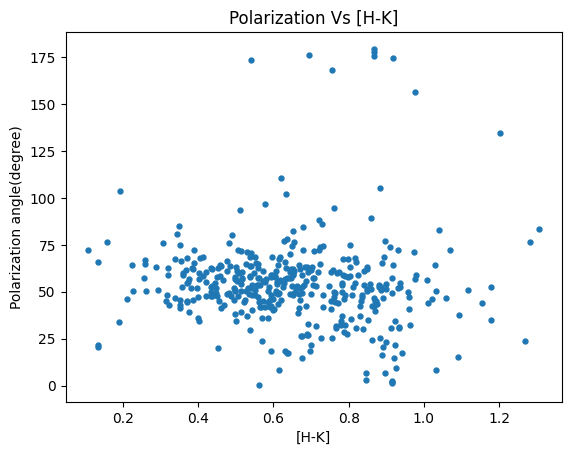

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=df1['cit-H-K']
y=df1['EPA']
print(len(df1['cit-H-K']))
plt.scatter(x,y,marker='.',s=50)
plt.xlabel('[H-K]')
plt.ylabel('Polarization angle(degree)')
plt.title('Polarization Vs [H-K]')
plt.savefig('THETA VS coLOR.png',dpi=300, bbox_inches='tight')

slope = 14.5

#plt.plot(x, slope*x, color='red')
#x_range = [0, 1.5]
#plt.plot(x_range, [slope*x_val for x_val in x_range], color='red')


plt.show()




239
m= 0.6086502707852026


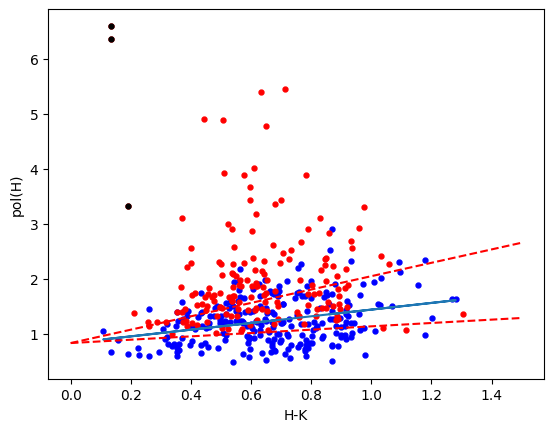

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
d1=df1[(df1['e_Pol']<0.3)&(df1['Pol']/df1['cit-H-K']<14.5)]
d2=df1[df1['e_Pol']>=0.3]
d3=df1[df1['Pol']/df1['cit-H-K']>14.5]
print(len(d1['cit-H-K']))
x1=d1['cit-H-K']
y1=d1['Pol']
x2=d2['cit-H-K']
y2=d2['Pol']
x4=d3['cit-H-K']
y4=d3['Pol']
plt.scatter(x1,y1,marker='.',s=50,color='blue')
plt.scatter(x2,y2,marker='.',s=50,color='red')
plt.scatter(x4,y4,marker='.',s=50,color='black')
plt.xlabel('H-K')
plt.ylabel('pol(H)')
#slope = 14.5
slope,intercept,r,p,std_err=stats.linregress(x1,y1)
print('m=',slope)
y3=slope*x1+intercept
plt.plot(x1,y3)
slope1=2*slope
x_range = [0, 1.5]
plt.plot(x_range, [slope1*x_val+intercept for x_val in x_range], color='red',linestyle='dashed')
slope2=(1/2)*slope
plt.plot(x_range, [slope2*x_val+intercept for x_val in x_range], color='red',linestyle='dashed')
#plt.title('Polarization Efficiency Diagram')
plt.savefig('Pol Vs H-K Plot.png',dpi=300, bbox_inches='tight')
plt.show()




(5968, 18)
(61, 22)


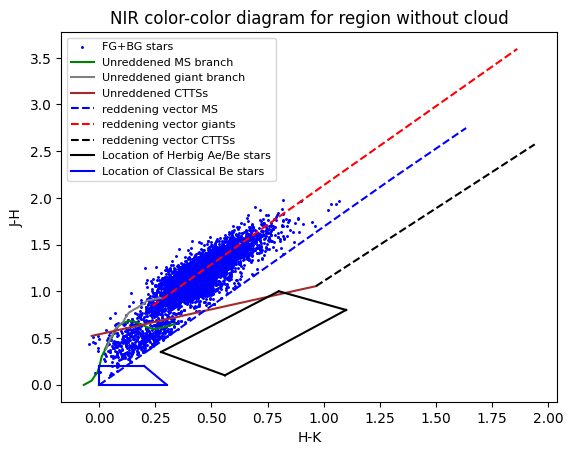

In [ ]:
import pandas as pd
data3=pd.read_csv('/content/region -1.tsv',sep='\t')
#print(data3['Pol'].head(10))
print(data3.shape)
data3['J-H']=data3['J2mag']-data3['H2mag']
data3['H-K']=data3['H2mag']-data3['Ks2mag']
data3['cit-J-H']=(data3['J-H']+0.047)/1.087
data3['cit-H-K']=(data3['H-K']-0.034)
import matplotlib.pyplot as plt
x=data3['cit-H-K']
y=data3['cit-J-H']
#plt.scatter(x,y,marker='.',s=10)
df10=data3[data3['cit-J-H']<1.69*data3['cit-H-K']]
df11=data3[data3['cit-J-H']>=1.69*data3['cit-H-K']]
print(df10.shape)
#plt.scatter(df10['cit-H-K'],df10['cit-J-H'],marker='.',s=50,color='red')
plt.scatter(df11['cit-H-K'],df11['cit-J-H'],marker='.',s=5,color='blue',label='FG+BG stars')
plt.xlabel('H-K')
plt.ylabel('J-H')

plt.title('NIR color-color diagram for region without cloud')
plt.plot(df2['cit-H-K'],df2['cit-J-H'],color='green',label='Unreddened MS branch')#dwarfs
plt.plot(df3['cit-H-K'],df3['cit-J-H'],color='grey',label='Unreddened giant branch')#giants
plt.plot(df4['cit-H-K'],df4['cit-J-H'],color='brown',label='Unreddened CTTSs')#ctt

plt.plot(df5['H-K'],df5['J-H'],linestyle='dashed',color='blue',label='reddening vector MS')#red vector ms
plt.plot(df6['H-K'],df6['J-H'],linestyle='dashed',color='red',label='reddening vector giants')#red vector giants
plt.plot(df7['cit-H-K'],df7['cit-J-H'],linestyle='dashed',color='black',label='reddening vector CTTSs')# red vector ctt

#Location of Herbig Ae/Be stars (black box)
plt.plot([0.275,0.56],[0.35,0.1],color='black',label='Location of Herbig Ae/Be stars')
plt.plot([0.56,1.1],[0.1,0.8],color='black')
plt.plot([1.1,0.8],[ 0.8,1.0],color='black')
plt.plot([ 0.8,0.275],[1.0,0.35],color='black')

#Location of Classical Be stars(blue box)
plt.plot([0,0.3],[0,0],color='blue',label='Location of Classical Be stars')
plt.plot([0,0],[0,0.2],color='blue')
plt.plot([0,0.2],[0.2,0.2],color='blue')
plt.plot([0.2,0.3],[0.2,0],color='blue')
plt.legend(loc='upper left',fontsize=8)


plt.savefig('color color digram-nearby region',dpi=300, bbox_inches='tight')
plt.show()


(5495, 11)
(145, 15)


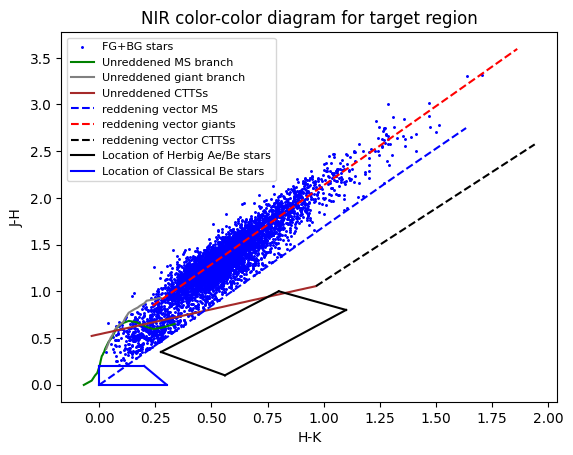

In [ ]:
import pandas as pd
data4=pd.read_csv('/content/2MASS -my region.tsv',sep='\t')

#print(data3['Pol'].head(10))
print(data4.shape)
data4['J-H']=data4['J2mag']-data4['H2mag']
data4['H-K']=data4['H2mag']-data4['Ks2mag']
data4['cit-J-H']=(data4['J-H']+0.047)/1.087
data4['cit-H-K']=(data4['H-K']-0.034)
import matplotlib.pyplot as plt
x=data4['cit-H-K']
y=data4['cit-J-H']
#plt.scatter(x,y,marker='.',s=10)
df12=data4[data4['cit-J-H']<1.69*data4['cit-H-K']]
df13=data4[data4['cit-J-H']>=1.69*data4['cit-H-K']]
print(df12.shape)
#plt.scatter(df12['cit-H-K'],df12['cit-J-H'],marker='.',s=50,color='red')
plt.scatter(df13['cit-H-K'],df13['cit-J-H'],marker='.',s=5,color='blue',label='FG+BG stars')
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.title('NIR color-color diagram for target region')
plt.plot(df2['cit-H-K'],df2['cit-J-H'],color='green',label='Unreddened MS branch')#dwarfs
plt.plot(df3['cit-H-K'],df3['cit-J-H'],color='grey',label='Unreddened giant branch')#giants
plt.plot(df4['cit-H-K'],df4['cit-J-H'],color='brown',label='Unreddened CTTSs')#ctt

plt.plot(df5['H-K'],df5['J-H'],linestyle='dashed',color='blue',label='reddening vector MS')#red vector ms
plt.plot(df6['H-K'],df6['J-H'],linestyle='dashed',color='red',label='reddening vector giants')#red vector giants
plt.plot(df7['cit-H-K'],df7['cit-J-H'],linestyle='dashed',color='black',label='reddening vector CTTSs')# red vector ctt

#Location of Herbig Ae/Be stars (black box)
plt.plot([0.275,0.56],[0.35,0.1],color='black',label='Location of Herbig Ae/Be stars')
plt.plot([0.56,1.1],[0.1,0.8],color='black')
plt.plot([1.1,0.8],[ 0.8,1.0],color='black')
plt.plot([ 0.8,0.275],[1.0,0.35],color='black')

#Location of Classical Be stars(blue box)
plt.plot([0,0.3],[0,0],color='blue',label='Location of Classical Be stars')
plt.plot([0,0],[0,0.2],color='blue')
plt.plot([0,0.2],[0.2,0.2],color='blue')
plt.plot([0.2,0.3],[0.2,0],color='blue')
plt.legend(loc='upper left',fontsize=8)


plt.savefig('color color digram-my region',dpi=300, bbox_inches='tight')
plt.show()


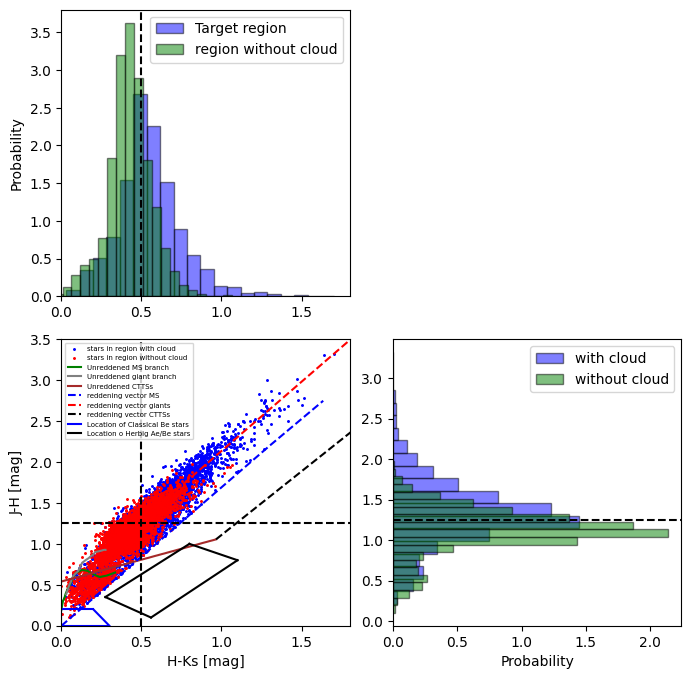

In [ ]:
# Create a grid of subplots with two rows and two columns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

#plotting source data
axs[1, 0].scatter(df13['cit-H-K'],df13['cit-J-H'],marker='.',s=5,color='blue',label='stars in region with cloud')
axs[1, 0].scatter(df11['cit-H-K'],df11['cit-J-H'],marker='.',s=5,color='red',label='stars in region without cloud')
# MS, giants,cttsloci
axs[1, 0].plot(df2['cit-H-K'],df2['cit-J-H'],color='green',label='Unreddened MS branch')#dwarfs
axs[1, 0].plot(df3['cit-H-K'],df3['cit-J-H'],color='grey',label='Unreddened giant branch')#giants
axs[1, 0].plot(df4['cit-H-K'],df4['cit-J-H'],color='brown',label='Unreddened CTTSs')#ctt
#plotting redvect of giants,ms,cttsloci
axs[1, 0].plot(df5['H-K'],df5['J-H'],linestyle='dashed',color='blue',label='reddening vector MS')#red vector ms
axs[1, 0].plot(df6['H-K'],df6['J-H'],linestyle='dashed',color='red',label='reddening vector giants')#red vector giants
axs[1, 0].plot(df7['cit-H-K'],df7['cit-J-H'],linestyle='dashed',color='black',label='reddening vector CTTSs')# red vector ctt

#limitting x,y axis
axs[1, 0].set_ylim(0.0,3.5)
axs[1, 0].set_xlim(0.0,1.8)
#plotting Classical Be stars
axs[1, 0].plot([0,0.3],[0,0],color='blue',label='Location of Classical Be stars')
axs[1, 0].plot([0,0],[0,0.2],color='blue')
axs[1, 0].plot([0,0.2],[0.2,0.2],color='blue')
axs[1, 0].plot([0.2,0.3],[0.2,0],color='blue')
#plotting Herbig Ae/Be stars
axs[1, 0].plot([0.275,0.56],[0.35,0.1],color='black',label='Location o Herbig Ae/Be stars')
axs[1, 0].plot([0.56,1.1],[0.1,0.8],color='black')
axs[1, 0].plot([1.1,0.8],[0.8,1.0],color='black')
axs[1, 0].plot([0.8,0.275],[1.0,0.35],color='black')
axs[1, 0].set_xlabel('H-Ks [mag]')
axs[1, 0].set_ylabel('J-H [mag]')
axs[1,0].legend(loc='upper left',fontsize='5')
axs[1,0].axhline(y=1.25,linestyle='dashed',color='black')
axs[1,0].axvline(x=0.5,linestyle='dashed',color='black')
# Plot the histogram of x values in the top-left subplot
axs[0, 0].hist(df13['cit-H-K'], bins=20, alpha=0.5, edgecolor='black', color='b', label='Target region', density=True, orientation='vertical')
axs[0, 0].hist(df11['cit-H-K'], bins=20, alpha=0.5, edgecolor='black', color='green', label='region without cloud', density=True, orientation='vertical')

# Plot the histogram of y values in the bottom-right subplot, rotated 90 degrees
axs[1, 1].hist(df13['cit-J-H'], bins=20, alpha=0.5, edgecolor='black', color='b', label='with cloud', density=True, orientation='horizontal')
axs[1, 1].hist(df11['cit-J-H'], bins=20, alpha=0.5, edgecolor='black', color='green', label='without cloud', density=True, orientation='horizontal')

# Set the titles and labels for the subplots
axs[0, 0].set_ylabel('Probability')
axs[0, 0].set_xlim(0,1.8)
axs[0,0].axvline(x=0.5,linestyle='dashed',color='black')
axs[0, 0].legend(loc='upper right')
axs[1, 1].set_xlabel('Probability')
#axs[1, 1].set_ylim(0,3.5)
axs[1,1].axhline(y=1.25,linestyle='dashed',color='black')
axs[1, 1].legend(loc='upper right')

fig.delaxes(axs[0, 1])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('Histograms',dpi=300, bbox_inches='tight')
# Show the plot
#axs.hlines(y=1.25,xmin=0,xmax=2,linestyle='dashed')
plt.show()

In [ ]:
import numpy as np
df13.fg= df13[(df13['cit-J-H']<1.25)&(df13['cit-H-K']<0.5)]
print(df13.shape)
print(df13.fg.shape)
mean=np.mean(df13.fg['cit-H-K'])
median=np.median(df13.fg['cit-H-K'])
mean2=np.mean(df13.fg['cit-J-H'])
median2=np.median(df13.fg['cit-J-H'])
stdev=np.std(df13.fg['cit-H-K'])
print(mean)
print(median)
print(mean2)
print(median2)
print('stdev=',stdev)

(5350, 15)
(1728, 15)
0.35775810185185186
0.3849999999999987
0.939207894647177
1.0193192272309106
stdev= 0.107453523778064


<ipython-input-32-1d800f69fd28>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df13.fg= df13[(df13['cit-J-H']<1.25)&(df13['cit-H-K']<0.5)]


In [ ]:
df15['Ext(H-K)']=(df15['cit-H-K']-median)/0.063
df15['Ext(J-H)']=(df15['cit-J-H']-1.019)/0.107
#print(df15['Ext(J-H)'])
#print(df15['Ext(H-K)'])
df15['exterr']=((df15['citerrHK']**2+ stdev**2)**1/2)/0.063
print(df15['exterr'].head(10))
df15=df15[df15['Ext(H-K)']/df15['exterr']>=2]
print(df15.shape)




0     0.091651
1     0.091641
2     0.091641
3     0.091641
4     0.091649
5     0.091638
6     0.091640
7     0.091642
10    0.091640
12    0.091640
Name: exterr, dtype: float64
(322, 43)


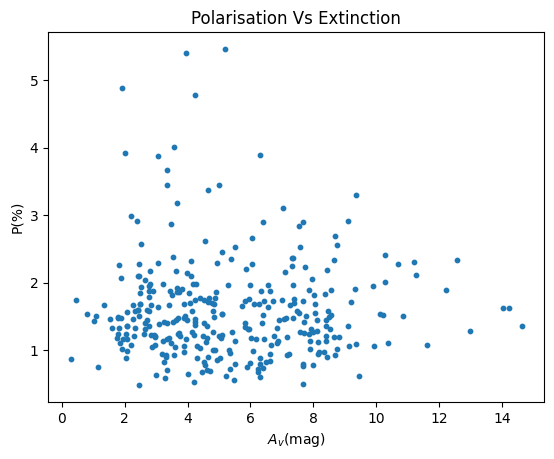

In [ ]:
y=df15['Pol']
x=df15['Ext(H-K)']
plt.scatter(x,y,s=10)
#plt.errorbar(x,y,xerr=df15['exterr'],yerr=df15['e_Pol'],fmt='o')
plt.title('Polarisation Vs Extinction')
plt.xlabel('$A_v$(mag)')
plt.ylabel('P(%)')
slope=3
y1=slope*x
#plt.plot(x,y1,linestyle='dashed',color='black')
plt.savefig('p vs E',dpi=300, bbox_inches='tight')
plt.show()

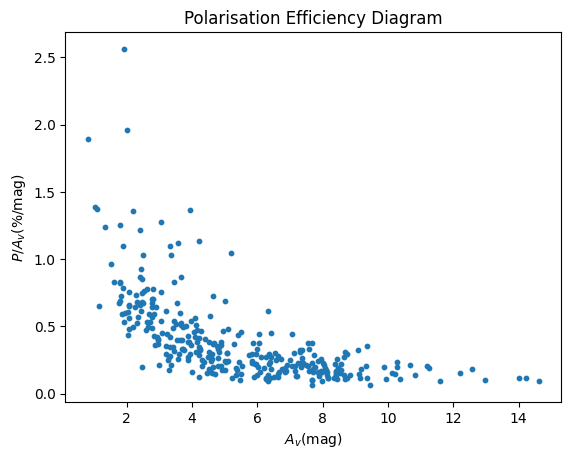

In [ ]:
df16=df15[df15['Pol']/df15['Ext(H-K)']<3]
y=df16['Pol']/df16['Ext(H-K)']
x=df16['Ext(H-K)']
plt.scatter(x,y,s=10)
plt.title('Polarisation Efficiency Diagram')
plt.xlabel('$A_v$(mag)')
plt.ylabel('$P/A_v$(%/mag)')
plt.show()
#print(x.shape)

m= -1.0158165176065523
yi= 0.40573553035248744


<function matplotlib.pyplot.show(close=None, block=None)>

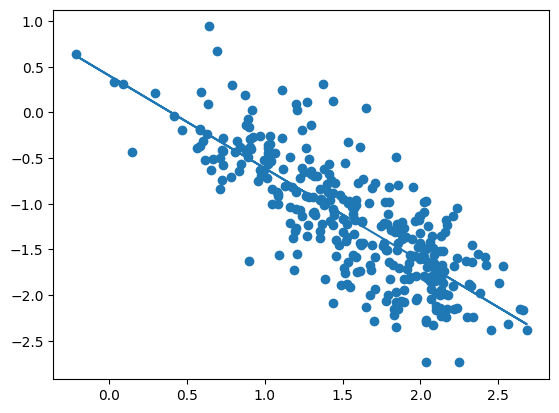

In [ ]:

X=np.log(x)
Y=np.log(y)
plt.scatter(X,Y)
slope,intercept,r,p,std_err=stats.linregress(X,Y)
print('m=',slope)
print('yi=',intercept)
y1=slope*X+intercept
plt.plot(X,y1)
plt.show


a= 1.5334939861550623
b= -0.9542062324071954


<function matplotlib.pyplot.show(close=None, block=None)>

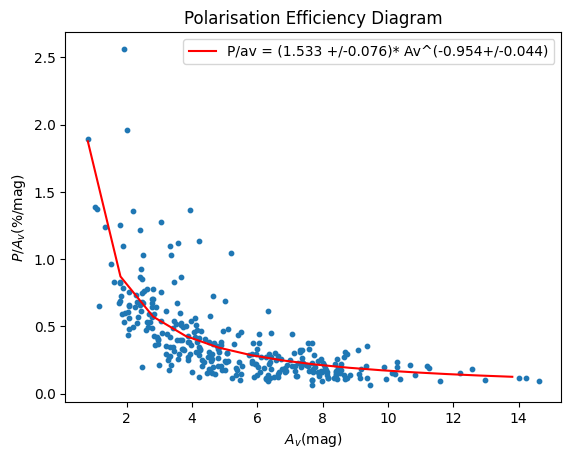

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import arange

def power_law(x,a,b):
    return a*x**b

popt,pcov=curve_fit(power_law,x,y)
a,b= popt
a_err, b_err = np.sqrt(np.diag(pcov))

print('a=',a)
print('b=',b)

x_line=arange(min(x),max(x),1)
y_line=power_law(x_line,a,b)

plt.scatter(x,y,s=10)
#plt.plot(x_line,y_line,'--',color='black')
plt.plot(x_line,y_line, 'r-', label='P/av = (%5.3f +/-%5.3f)* Av^(%5.3f+/-%5.3f)' % (a,a_err,b,b_err))
plt.title('Polarisation Efficiency Diagram')
plt.xlabel('$A_v$(mag)')
plt.ylabel('$P/A_v$(%/mag)')
plt.legend(loc='upper right')
plt.savefig('ped',dpi=300, bbox_inches='tight')
plt.show

(405, 40)
(2, 40)
(81, 40)
(322, 40)


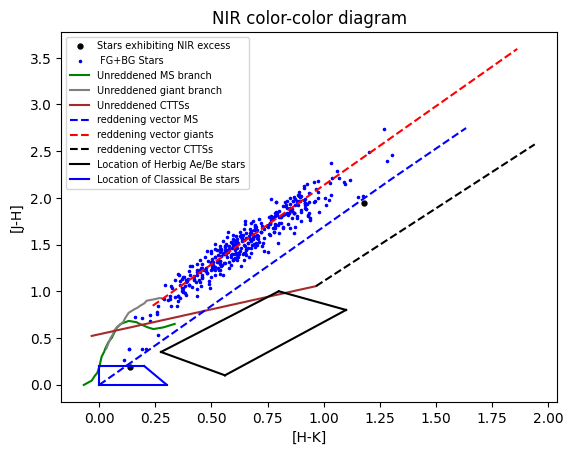

In [ ]:
import matplotlib.pyplot as plt
x=df1['cit-H-K']
y=df1['cit-J-H']
#plt.scatter(x,y,marker='.',s=10)
df8=df1[df1['cit-J-H']<1.69*df1['cit-H-K']]
df9=df1[(df1['cit-J-H']>=1.69*df1['cit-H-K'])]#|(df1['cit-H-K']>0.5)|(df1['cit-J-H']>1.25)]
df14=df9[(df9['cit-H-K']<0.5)&(df9['cit-J-H']<1.25)]
df15=df9[(df9['cit-H-K']>0.5)|(df9['cit-J-H']>1.25)]
df15=pd.DataFrame(df15)
#print(df15['cit-H-K'].head(10))
#print(df15['cit-J-H'].head(10))
#print(df15['citerrHK'].head(10))
print(df1.shape)
#print(df8.shape)
print(df8.shape)
print(df14.shape)
print(df15.shape)
plt.scatter(df8['cit-H-K'],df8['cit-J-H'],marker='.',s=50,color='black',label='Stars exhibiting NIR excess')#NIR Excess
plt.scatter(df9['cit-H-K'],df9['cit-J-H'],marker='.',s=10,color='blue',label=' FG+BG Stars')
#plt.scatter(df14['cit-H-K'],df14['cit-J-H'],marker='.',s=10,color='red',label='Foreground Stars')#foreground
#plt.scatter(df15['cit-H-K'],df15['cit-J-H'],marker='.',s=10,color='blue',label='Background Stars')#background

plt.xlabel('[H-K]')
plt.ylabel('[J-H]')
plt.title('NIR color-color diagram')
plt.plot(df2['cit-H-K'],df2['cit-J-H'],color='green',label='Unreddened MS branch')#dwarfs
plt.plot(df3['cit-H-K'],df3['cit-J-H'],color='grey',label='Unreddened giant branch')#giants
plt.plot(df4['cit-H-K'],df4['cit-J-H'],color='brown',label='Unreddened CTTSs')#ctt

plt.plot(df5['H-K'],df5['J-H'],linestyle='dashed',color='blue',label='reddening vector MS')#red vector ms
plt.plot(df6['H-K'],df6['J-H'],linestyle='dashed',color='red',label='reddening vector giants')#red vector giants
plt.plot(df7['cit-H-K'],df7['cit-J-H'],linestyle='dashed',color='black',label='reddening vector CTTSs')# red vector ctt

#Location of Herbig Ae/Be stars (black box)
plt.plot([0.275,0.56],[0.35,0.1],color='black',label='Location of Herbig Ae/Be stars')
plt.plot([0.56,1.1],[0.1,0.8],color='black')
plt.plot([1.1,0.8],[ 0.8,1.0],color='black')
plt.plot([ 0.8,0.275],[1.0,0.35],color='black')

#Location of Classical Be stars(blue box)
plt.plot([0,0.3],[0,0],color='blue',label='Location of Classical Be stars')
plt.plot([0,0],[0,0.2],color='blue')
plt.plot([0,0.2],[0.2,0.2],color='blue')
plt.plot([0.2,0.3],[0.2,0],color='blue')
plt.legend(loc='upper left',fontsize=7)
plt.savefig('color diagram',dpi=300, bbox_inches='tight')
plt.show()


1.6016614906832296 0.7495890760456495


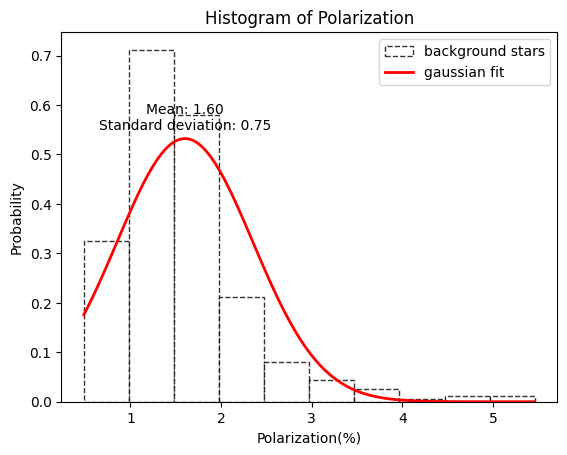

53.760841614906816 26.470766722178777


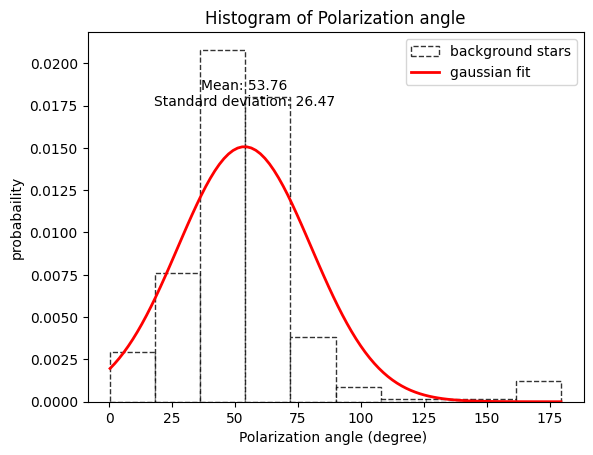

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
a=df15['Pol']
mu,sigma=stats.norm.fit(a)
print(mu,sigma)
x=np.linspace(a.min(),a.max(),100)
b=stats.norm.pdf(x,loc=mu,scale=sigma)
plt.hist(a,density=True,alpha=0.8,color='white',edgecolor='black',linestyle='dashed',label='background stars')
plt.plot(x,b,'r-',linewidth=2,label='gaussian fit')
plt.text(mu,0.55, f"Mean: {mu:.2f}\nStandard deviation: {sigma:.2f}", fontsize=10, ha='center')
#plt.hist(a)
plt.title('Histogram of Polarization')
plt.xlabel('Polarization(%)')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.savefig('Histogram of polarisation fg and bg.png',dpi=300, bbox_inches='tight')
plt.show()


y=df15['EPA']
mu,sigma=stats.norm.fit(y)
print(mu,sigma)
x=np.linspace(y.min(),y.max(),100)
b=stats.norm.pdf(x,loc=mu,scale=sigma)
plt.hist(y,density=True,alpha=0.8,color='white',edgecolor='black',linestyle='dashed',label='background stars')
plt.plot(x,b,'r-',linewidth=2,label='gaussian fit')
plt.text(mu,0.0175, f"Mean: {mu:.2f}\nStandard deviation: {sigma:.2f}", fontsize=10, ha='center')
plt.title('Histogram of Polarization angle')
plt.xlabel('Polarization angle (degree) ')
plt.ylabel('probabaility')
plt.legend(loc='upper right')


plt.savefig('Histogram of polarisation angle fg and bg.png',dpi=300, bbox_inches='tight')
plt.show()




53.760841614906816 26.470766722178777
56.48482716049382 13.243445429129235


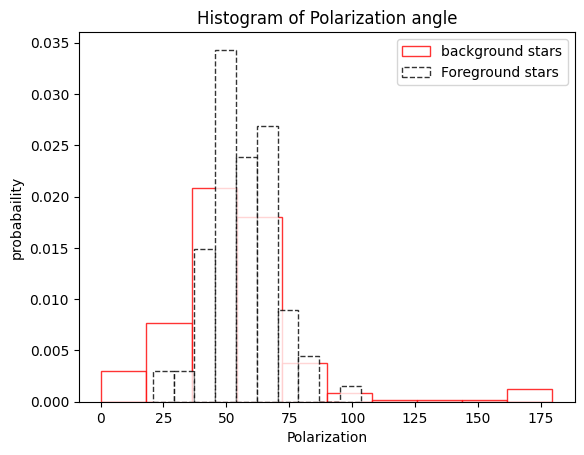

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
a=df15['EPA']
mu,sigma=stats.norm.fit(a)
print(mu,sigma)
x=np.linspace(a.min(),a.max(),100)
b=stats.norm.pdf(x,loc=mu,scale=sigma)
plt.hist(a,density=True,alpha=0.8,color='white',edgecolor='red',label='background stars')
#plt.plot(x,b,'r-',linewidth=2)
#plt.text(mu,0.5, f"Mean: {mu:.2f}\nStandard deviation: {sigma:.2f}", fontsize=10, ha='center')
#plt.hist(a)
plt.title('Histogram of Polarization')
plt.xlabel('Polarization(%)')
plt.ylabel('Probability')
#plt.legend(loc='upper right')


y=df14['EPA']
mu,sigma=stats.norm.fit(y)
print(mu,sigma)
x=np.linspace(y.min(),y.max(),100)
b=stats.norm.pdf(x,loc=mu,scale=sigma)
plt.hist(y,density=True,alpha=0.8,color='white',edgecolor='black',linestyle='dashed',label='Foreground stars')
#plt.plot(x,b,'r-',linewidth=2)
#plt.text(mu,0.017, f"Mean: {mu:.2f}\nStandard deviation: {sigma:.2f}", fontsize=10, ha='center')
plt.title('Histogram of Polarization angle')
plt.xlabel('Polarization')
plt.ylabel('probabaility')
plt.legend(loc='upper right')

#plt.savefig('Histogram of polarisation angle fg and bg.png',dpi=300, bbox_inches='tight')
plt.show()
